In [2]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import random
from config import gkey
import list 

ModuleNotFoundError: No module named 'config'

In [3]:
df = pd.read_csv (r'COVID-19 Cases.csv')
df.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,iso3,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime
0,Confirmed,NaN,0,0,2/3/2020,Switzerland,Switzerland,NaN,NaN,CH,CHE,NaN,46.8182,8.2275,8654618.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 11:20:35 PM
1,Deaths,NaN,0,0,3/1/2020,Cyprus,Cyprus,NaN,NaN,CY,CYP,NaN,35.1264,33.4299,1207361.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 11:20:35 PM
2,Confirmed,NaN,23,0,4/21/2020,Antigua and Barbuda,Antigua and Barbuda,NaN,NaN,AG,ATG,NaN,17.0608,-61.7964,97928.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 11:20:35 PM
3,Deaths,NaN,0,0,2/11/2020,Jamaica,Jamaica,NaN,NaN,JM,JAM,NaN,18.1096,-77.2975,2961161.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 11:20:35 PM
4,Confirmed,NaN,0,0,2/6/2020,Belize,Belize,NaN,NaN,BZ,BLZ,NaN,17.1899,-88.4976,397621.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 11:20:35 PM


In [4]:
df.columns

Index(['Case_Type', 'People_Total_Tested_Count', 'Cases', 'Difference', 'Date',
       'Combined_Key', 'Country_Region', 'Province_State', 'Admin2', 'iso2',
       'iso3', 'FIPS', 'Lat', 'Long', 'Population_Count',
       'People_Hospitalized_Cumulative_Count', 'Data_Source',
       'Prep_Flow_Runtime'],
      dtype='object')

In [5]:
df.count

<bound method DataFrame.count of         Case_Type  People_Total_Tested_Count  Cases  Difference       Date  \
0       Confirmed                        NaN      0           0   2/3/2020   
1          Deaths                        NaN      0           0   3/1/2020   
2       Confirmed                        NaN     23           0  4/21/2020   
3          Deaths                        NaN      0           0  2/11/2020   
4       Confirmed                        NaN      0           0   2/6/2020   
...           ...                        ...    ...         ...        ...   
689719  Confirmed                        NaN      0           0  1/22/2020   
689720  Confirmed                        NaN      0           0  1/22/2020   
689721  Confirmed                        NaN      0           0  1/22/2020   
689722  Confirmed                        NaN      0           0  1/22/2020   
689723  Confirmed                        NaN      0           0  1/22/2020   

                       Combine

In [6]:
mask1 = df["Country_Region"] == "US"
mask2 = df["Case_Type"] == "Deaths"
mask3 = df["Date"] == "4/28/2020"
mask4 = mask1 & mask2 & mask3

mask5= df.loc[mask4]
mask5.head(3)

,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,iso3,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime
50618,Deaths,NaN,0,0,4/28/2020,"Pondera, Montana, US",US,Montana,Pondera,US,USA,30073.0,48.227734,-112.225270,5911.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 11:20:35 PM
50821,Deaths,NaN,4,0,4/28/2020,"McLennan, Texas, US",US,Texas,McLennan,US,USA,48309.0,31.552555,-97.202177,256623.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 11:20:35 PM
50853,Deaths,NaN,0,0,4/28/2020,"Kearny, Kansas, US",US,Kansas,Kearny,US,USA,20093.0,38.000180,-101.321681,3838.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,4/28/2020 11:20:35 PM


In [7]:
index1 = df["Lat"] == "Lat"
index2 = df["Long"] == "Long"
location = index1 & index2


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [8]:
deaths=mask5.groupby("Province_State").sum()["Cases"]
#total_cases = mask5.groupby("Province_State").sum()["Cases"]
deaths

Province_State
Alabama                       242
Alaska                          9
American Samoa                  0
Arizona                       275
Arkansas                       57
California                   1864
Colorado                      736
Connecticut                  2087
Delaware                      137
District of Columbia          190
Florida                      1171
Georgia                      1036
Guam                            5
Hawaii                         16
Idaho                          60
Illinois                     2125
Indiana                       901
Iowa                          136
Kansas                        127
Kentucky                      225
Louisiana                    1801
Maine                          51
Maryland                     1016
Massachusetts                3153
Michigan                     3568
Minnesota                     301
Mississippi                   239
Missouri                      330
Montana                        15

In [9]:
deaths["New York"]

22912

In [10]:
deaths["Texas"]

719

In [11]:
TexVSNY=[deaths["Texas"],deaths["New York"]]
xLales=["Texas","New York"]

In [12]:
nb_deaths=list(deaths)

In [13]:
#groupby the state and case 
mask5.groupby("Province_State").mean()["Cases"].head()
#mask5.groupby("Province_State").count()["Cases"]
#mask5.groupby("Province_State").nunique()["Cases"]

Province_State
Alabama            3.507246
Alaska             0.290323
American Samoa     0.000000
Arizona           16.176471
Arkansas           0.740260
Name: Cases, dtype: float64

In [14]:
mask5.groupby("Province_State").nunique()["Cases"].head()

Province_State
Alabama           14
Alaska             3
American Samoa     1
Arizona            9
Arkansas           8
Name: Cases, dtype: int64

In [15]:
states=list(mask5["Province_State"])
states=list(set(states))
statesAZ=sorted(states)
statesAZ

['Alabama',
 'Alaska',
 'American Samoa',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Northern Mariana Islands',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


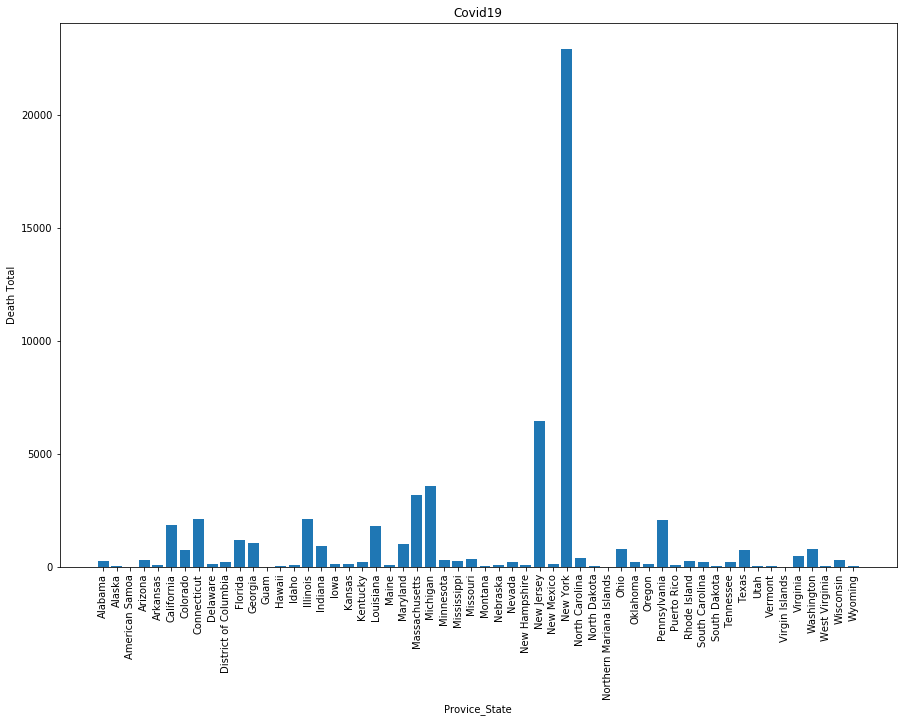

In [16]:
#plot bar map of all death total for the US 
plt.bar(statesAZ,nb_deaths ) #, color="g", align="center")
plt.xlabel("Provice_State")
plt.ylabel("Death Total")
plt.xticks(rotation=90)
plt.title("Covid19")
fig=plt.gcf()
fig.set_size_inches(15,10)
fig.show()

In [4]:
# The maximum x value for our chart will be 100
#x_limit = 100

# List of values from 0 to 100 each value being 1 greater than the last
#x_axis = np.arange(0, x_limit, 1)

# Create a random array of data that we will use for our y values
#data = [random.random() for value in x_axis]

In [5]:
plt.scatter(x_axis, data, marker="o", facecolors="green", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.scatter(statesAZ,nb_deaths ) , #color="g", align="center")
plt.xlabel("Provice_State")
plt.ylabel("Death Total")
plt.xticks(rotation=90)
plt.title("Covid19")
fig=plt.gcf()
fig.set_size_inches(15,15)
fig.show()

NameError: name 'plt' is not defined

In [3]:
plt.scatter(x_axis, data, marker="o", facecolors="green", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.scatter(TexVSNY,xLales ) , color="g", align="center")
plt.xlabel("Provice_State")
plt.ylabel("Death Total")
plt.xticks(rotation=90)
plt.title("Covid19")
fig=plt.gcf()
fig.set_size_inches(15,15)
fig.show()

SyntaxError: invalid syntax (<ipython-input-3-d9e02cbfb736>, line 3)

In [1]:
plt.bar(TexVSNY,xLales ) , #color="g", align="center")
plt.xlabel("Provice_State")
plt.ylabel("Death Total")
plt.xticks(rotation=90)
plt.title("Covid19")
fig=plt.gcf()
fig.set_size_inches(15,10)
fig.show()

#TexVSNY=[deaths["Texas"],deaths["New York"]]
#xLales=["Texas","New York"]

NameError: name 'plt' is not defined